Surface

In [1]:
# import numpy as np

# Sx=np.gradient(surface[0,:,:],axis=0)
# Sy=np.gradient(surface[0,:,:],axis=1)
# # print(norm.cdf(Sx))
# import matplotlib.pyplot as plt
# plt.hist(Sx.flatten(), bins=50, density=True, alpha=0.5, label="Upwind Slopes");
# plt.hist(Sy.flatten(), bins=50, density=True, alpha=0.5, label="Crosswind Slopes");
# plt.legend()
# print(f"Variance of slopes {np.var(Sx.flatten())+np.var(Sy.flatten())}")
# A=(np.power(wavenumbers,2)*spectrum).reshape(-1,1)*spreading

# print(f"Integral {np.trapz(np.trapz(A,wavenumbers, axis=0), x=theta, axis=0)}")      


In [2]:
import matplotlib.pyplot as plt
from omnidirectional_spectrum import spectrum_model
from spreading_function import spreading_model
import numpy as np
spectrum=spectrum_model.Pierson_Moskowitz
spreading=spreading_model.Longuet_Higgins
n=2
S=8
length=512
N=256
wind_speed=10
wind_direction=0
seconds=5
timestep=0.5
fetch=25000
elfouhaily_k=0.1

In [3]:

from surface import surfaceGenerator
surfaceGenerator=surfaceGenerator(spectrum, spreading, length, N, wind_speed, wind_direction, n, S, seconds, timestep, fetch, elfouhaily_k)
Z=surfaceGenerator.generate()


256
2.0
512


Surface Variances [0.2757586564045654, 0.2757745813317468, 0.2758225101240175, 0.2758285792109123, 0.27582233131388306, 0.27585554617459507, 0.2758784791252291, 0.2758319451811969, 0.27573450127310223, 0.27568453175938623]
Spectrum Integral 0.2532854974269867
Slope Variances 0.03049428650111844
Slope Integral 0.0018367089796811342
Significant wave height [2.1005091055439506, 2.1005697563537256, 2.1007522847742615, 2.1007753966987037, 2.1007516038366196, 2.1008780875608943, 2.100965412852783, 2.1007882146706627, 2.1004171062838055, 2.10022677541026]


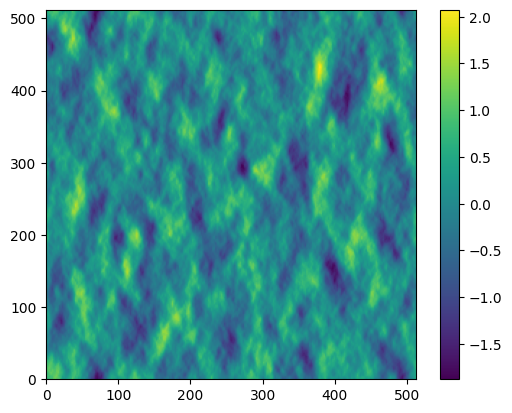

In [4]:
plt.imshow(Z[0,:,:],extent=[0,length,0,length], origin='lower')
plt.colorbar()
import imageio
# from matplotlib.animation import FuncAnimation
# # with imageio.get_writer('wave_field.gif', mode='I') as writer:
# #     for surface in Z:
# #         plt.imshow(surface,extent=[0,length,0,length], origin='lower', cmap='viridis')
# #         plt.pause(0.1)
# #         plt.close()
# #         writer.append_data((surface*255).astype(np.uint8))
# # Create a figure and axis
# fig, ax = plt.subplots()
# fig.set_dpi(100)
# # Function to update the plot for each frame
# def update(frame):
#     ax.clear()  # Clear previous frame
#     im=ax.imshow(Z[frame], cmap='viridis', extent=[0, length, 0, length], origin='lower')  # Plot elevation data
#     ax.set_title(f'Surface Elevation')  # Set title

# # Create the animation
# ani = FuncAnimation(fig, update, frames=len(Z), interval=200)

# # Save the animation as a GIF using imageio
# filename = 'elevation_animation.mp4'
# ani.save(filename, writer='ffmpeg')
# with imageio.get_writer(filename, mode='I') as writer:
#     for i, x in enumerate(Z):
#         update(i)  # Update plot for each frame
#         fig.canvas.draw()  # Redraw the figure
#         image = np.frombuffer(fig.canvas.buffer_rgba(), dtype='uint8')
#         image = image.reshape(fig.canvas.get_width_height()[::-1] + (4,))[:, :, :3]
#         writer.'append_data(image)  # Append frame to GIF
#     plt.close(fig)
print(f"Surface Variances {surfaceGenerator.getSurfaceVariances()}")
print(f"Spectrum Integral {surfaceGenerator.getSpectrumIntegral()}")
print(f"Slope Variances {surfaceGenerator.getSlopesVariance()}")
print(f"Slope Integral {surfaceGenerator.getSlopeIntegral()}")
print(f"Significant wave height {surfaceGenerator.getSignificantWaveHeights()}")

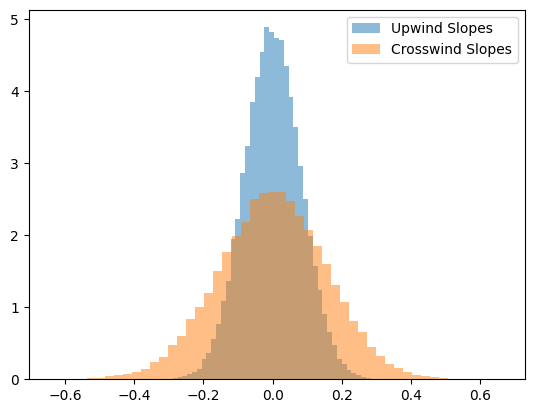

In [5]:
Sx, Sy=surfaceGenerator.getSlopes()
plt.hist(Sx, bins=50, density=True, alpha=0.5, label="Upwind Slopes");
plt.hist(Sy, bins=50, density=True, alpha=0.5, label="Crosswind Slopes");
plt.legend()

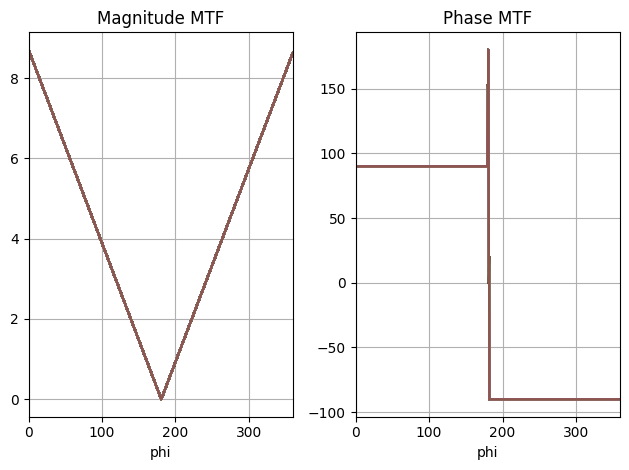

In [6]:
from SAR_imaging import SAR_imaging

k=surfaceGenerator.k
# kx, ky=np.meshgrid(np.linspace(-0.5, 0.5, 256), np.linspace(-0.5, 0.5, 256))
kx, ky=np.meshgrid((surfaceGenerator.KY[:,0]), surfaceGenerator.KY[:,0])
# kx, ky=np.meshgrid(np.sin(np.linspace(0, 2*np.pi,N)), np.sin(np.linspace(0, 2*np.pi,N)))
sar=SAR_imaging(Z[0,:,:], spectrum, np.pi/6, ky,  surfaceGenerator.omega, wind_speed, fetch)   
#-(4*np.cos(self.look_angle)/np.sin(self.look_angle))/(1+np.sin(self.look_angle)**2)*(1j*self.ky)

tilt=sar.tilt()#4.5*surfaceGenerator.omega[0,:]*(surfaceGenerator.k[0,:]*np.sin(theta))**2*(surfaceGenerator.omega[0,:]-0.01*1j)/(np.abs(surfaceGenerator.k[0,:])*(surfaceGenerator.omega[0,:]**2+0.1**2))
hydrodynamic=sar.hydrodynamic()
plt.subplot(1, 2, 1)
plt.plot(np.linspace(0,360,N),np.abs(tilt), label="tilt")
# plt.plot(np.linspace(0,360,N),np.abs(hydrodynamic), label="hydrodynamic")
plt.xlim(0, 360)
plt.xlabel('phi')
plt.title('Magnitude MTF')
plt.grid(True)
# plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.linspace(0,360,N),np.degrees(np.angle(tilt)), label="tilt")
# plt.plot(np.linspace(0,360,N),np.degrees(np.angle(hydrodynamic)), label="hydrodynamic")
plt.xlim(0, 360)
plt.xlabel('phi')
plt.title('Phase MTF')
plt.grid(True)
plt.tight_layout()
plt.show()


/home/eltjon/Thesis/OceanSARImagingSimulator/omnidirectional_spectrum.py:58: RuntimeWarning: divide by zero encountered in divide
  return (a/(2*np.power(self.k,3)))*np.exp(-b*np.power(g/self.k,2)/V4)
/home/eltjon/Thesis/OceanSARImagingSimulator/omnidirectional_spectrum.py:58: RuntimeWarning: invalid value encountered in multiply
  return (a/(2*np.power(self.k,3)))*np.exp(-b*np.power(g/self.k,2)/V4)


(-80.0, 70.0)

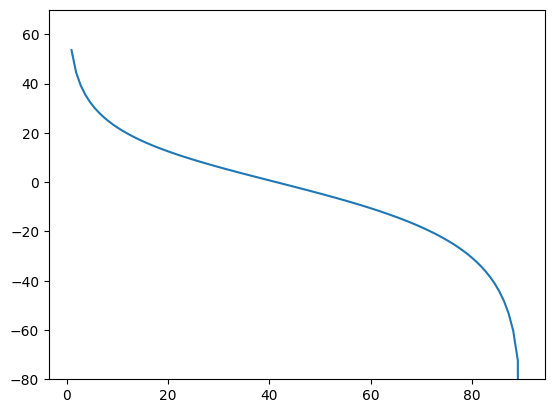

In [7]:
thetas=np.linspace(0, np.pi/2, 100)
NRCS=[(sar.average_NRCS(theta)) for theta in thetas]
plt.plot(np.degrees(thetas), 10*np.log10(NRCS))
# plt.yscale('log')
plt.ylim(-80,70)

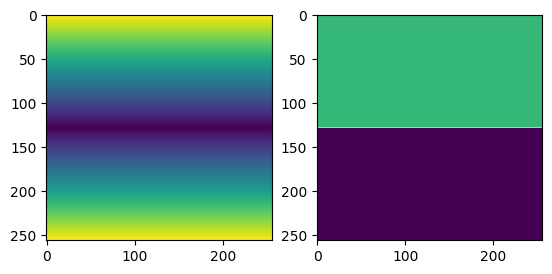

In [8]:
plt.subplot(1, 2, 1)
plt.imshow(abs(sar.tilt()))
plt.subplot(1,2,2)
plt.imshow(np.degrees(np.angle(sar.tilt())))

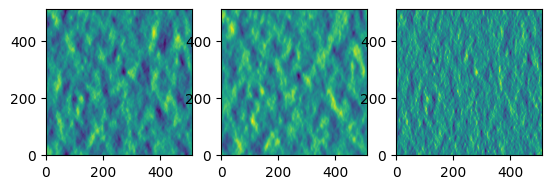

In [9]:
# a=(2*np.fft.ifft2(sar.tilt()*np.fft.fft2(sar.surface)))
plt.subplot(1, 3, 1)
plt.imshow(sar.surface,extent=[0,length,0,length], origin='lower')
plt.subplot(1, 3, 2)
# fft=np.fft.fft2(sar.surface)
# tilt=sar.tilt()*fft
# a=tilt+tilt.conj()
ky=sar.ky
a=(2*np.fft.ifft2((sar.tilt())*(np.fft.fft2(sar.surface))))
a=a.real
plt.imshow(a,extent=[0,length,0,length], origin='lower')
# plt.colorbar()
plt.subplot(1,3,3)
# plt.imshow(np.sqrt(np.gradient(sar.surface,2,axis=0)**2+np.gradient(sar.surface,2,axis=1)**2), extent=[0,length,0,length], origin='lower')
plt.imshow(np.gradient(sar.surface, 2, axis=1),extent=[0,length,0,length], origin='lower')
# plt.colorbar()

In [ ]:
k_temp=ky/np.sin(np.linspace(0, 2*np.pi, N))
k_orig=surfaceGenerator.KX

In [ ]:
surfaceGenerator.omnidirectional_spectrum.plot()
# surfaceGenerator.spreading_function.plot()

In [ ]:
from superImposition_surface import superImpositionSurfaceGenerator

superImpositionSurfaceGenerator=superImpositionSurfaceGenerator(spectrum, spreading, length, N, wind_speed, wind_direction, n, S, 1, 1, fetch, elfouhaily_k)
ZZ=superImpositionSurfaceGenerator.generate()

In [ ]:
plt.imshow(ZZ[0,:,:],extent=[0,length,0,length])
plt.gca().invert_yaxis()
plt.colorbar()
print(f"Surface Variances {superImpositionSurfaceGenerator.getSurfaceVariances()}")
print(f"Spectrum Integral {superImpositionSurfaceGenerator.getSpectrumIntegral()}")
print(f"Slope Variances {superImpositionSurfaceGenerator.getSlopes()}")
print(f"Slope Integral {superImpositionSurfaceGenerator.getSlopeIntegral()}")
print(f"Significant wave height {superImpositionSurfaceGenerator.getSignificantWaveHeights()}")
print(np.trapz(np.trapz((np.power(superImpositionSurfaceGenerator.wavenumbers,2)*superImpositionSurfaceGenerator.S).reshape(-1,1)*superImpositionSurfaceGenerator.D,superImpositionSurfaceGenerator.wavenumbers, axis=0), superImpositionSurfaceGenerator.theta, axis=0))

In [ ]:
superImpositionSurfaceGenerator.omnidirectional_spectrum.plot()
# superImpositionSurfaceGenerator.spreading_function.plot()

In [ ]:
from SAR_imaging import SAR_imaging
theta=np.linspace(0, 2*np.pi, 500)
costheta=np.sin(theta)
k=superImpositionSurfaceGenerator.wavenumbers
sar=SAR_imaging(ZZ[0,:,:], superImpositionSurfaceGenerator.PSI, np.pi/3, (k*costheta), superImpositionSurfaceGenerator.omega)   
tilt=sar.tilt()
plt.subplot(1, 2, 1)
plt.plot(abs(tilt))
plt.xlabel('phi')
plt.title('Magnitude MTF')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(np.angle(tilt))
plt.xlabel('phi')
plt.title('Phase MTF')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, (ax1,ax2, ax3, ax4, ax5)=plt.subplots(1,5)
ax1.contour(surfaceGenerator.KX, surfaceGenerator.KY, surfaceGenerator.PSI)
ax1.set_xlim(-0.5,0.5)
ax1.set_ylim(-0.5,0.5)

ax2.imshow(Z[0,:,:], origin="lower")

ax3.imshow(abs(np.fft.fftshift(np.fft.fft2(Z[0,:,:])))**2)
ax3.set_xlim(100,150)
ax3.set_ylim(100,150)

ax4.imshow(np.real(np.fft.fftshift(np.fft.fft2(Z[0,:,:]))))
ax4.set_xlim(100,150)
ax4.set_ylim(100,150)
ax5.imshow(np.imag(np.fft.fftshift(np.fft.fft2(Z[0,:,:]))))
ax5.set_xlim(100,150)
ax5.set_ylim(100,150)


# ax2.gca().invert_yaxis()
# plt.colorbar()
kx=surfaceGenerator.KX[0,:]
# print()
print(np.trapz(np.trapz(surfaceGenerator.PSI, surfaceGenerator.KX[0,:], axis=0), surfaceGenerator.KY[:,0]))
print(np.var(Z[0,:,:]))

In [ ]:
# %matplotlib widget
# from matplotlib.animation import FuncAnimation
# fig, ax = plt.subplots()
# L=512
# img = ax.imshow(Z[0,:,:], cmap='viridis',extent=[0, L, 0, L])
# # cbar=fig.colorbar(img)
# def update(frame):
#     img.set_data(Z[int(frame),:,:])  # Update the image data
#     ax.set_title(u"Frame {}°".format(frame))
#     return img,

# # Create the animation
# ani = FuncAnimation(fig, update, frames=10, interval=1)

# plt.show()

In [ ]:
Sx=np.gradient(ZZ[0,:,:],axis=0)
Sy=np.gradient(ZZ[0,:,:],axis=1)
# print(norm.cdf(Sx))
import matplotlib.pyplot as plt
plt.hist(Sx.flatten(), bins=50, density=True, alpha=0.5, label="Upwind Slopes");
plt.hist(Sy.flatten(), bins=50, density=True, alpha=0.5, label="Crosswind Slopes");
plt.legend()